## Time series components

### Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend “changing direction” when it might go from an increasing trend to a decreasing trend.
### Seasonal
A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.
### Cyclic
A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years.


https://www.otexts.org/fpp/6/1

https://rpubs.com/Emmad/219312

https://rpubs.com/priyankaigit/pa-hw2-ch8

In [12]:
#install.packages("fma")

In [6]:
library("forecast")
library(fma)   # for ibmclose data

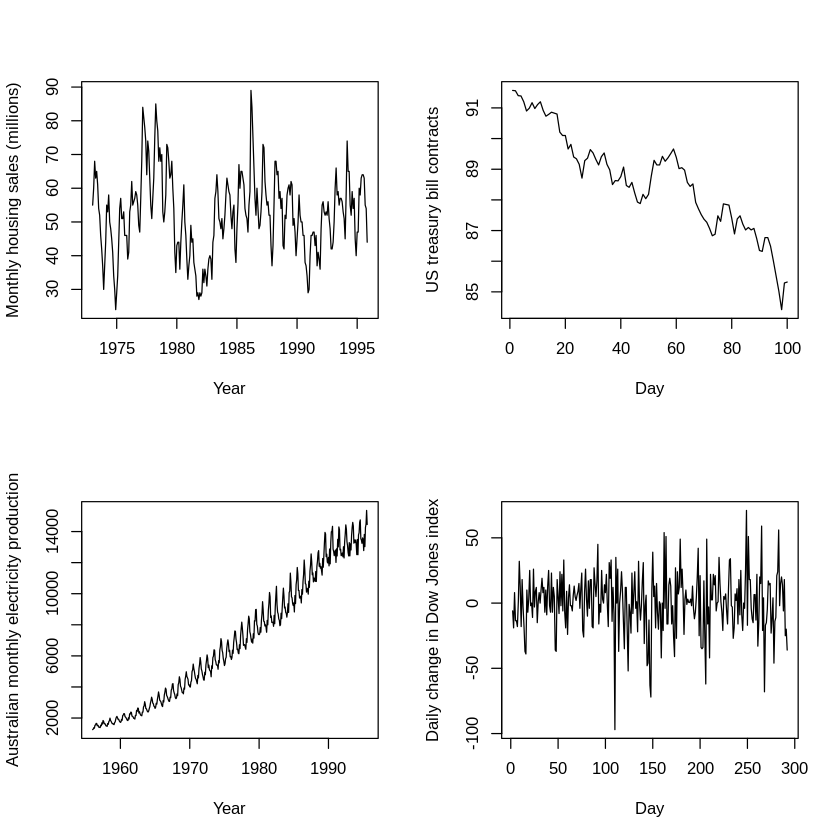

In [7]:
par(mfrow=c(2,2))
plot(hsales,xlab="Year",ylab="Monthly housing sales (millions)")
plot(ustreas,xlab="Day",ylab="US treasury bill contracts")
plot(elec,xlab="Year",ylab="Australian monthly electricity production")
plot(diff(dj),xlab="Day",ylab="Daily change in Dow Jones index")

## Time series decomposition

We shall think of the time series yt as comprising three components: 

a seasonal component, 

a trend-cycle component (containing both trend and cycle), 


and a remainder component (containing anything else in the time series).


For example, if we assume an additive model, then we can write


$$yt=St+Tt+Et,$$

where yt is the data at period tt, StSt is the seasonal component at period tt, TtTt is the trend-cycle component at period tt and EtEt is the remainder (or irregular or error) component at period tt. Alternatively, a multiplicative model would be written as


$$yt=St×Tt×Et.$$

The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series.


When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be **proportional to the level** of the time series, then a multiplicative model is more appropriate. 


With economic time series, **multiplicative models are common**.

An alternative to using a multiplicative model, is to first transform the data until the variation in the series appears to be stable over time, and then use an additive model. When a log transformation has been used, this is equivalent to using a multiplicative decomposition because


$$yt=St×Tt×Et \ \text{is equivalent to} \  logyt=logSt+logTt+logEt.$$


Sometimes, the trend-cycle component is simply called the “trend” component, even though it may contain cyclic behaviour as well.

In [3]:
#install.packages("fpp")
library(fpp)
#http://www.science.smith.edu/~amcnamara/sds291/labs/lab_time_series.html

Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries


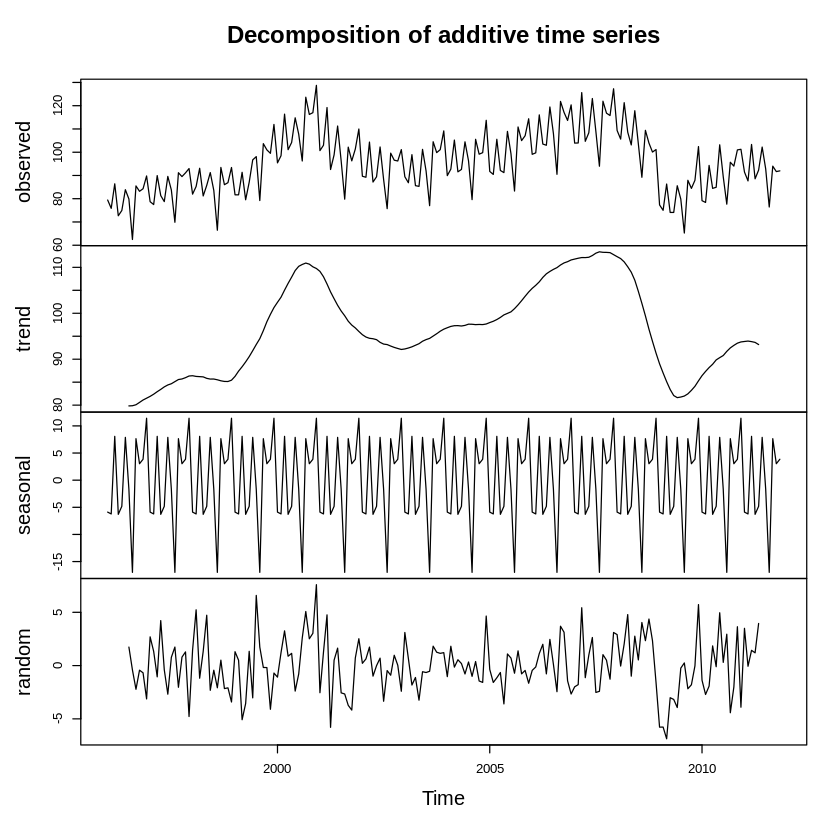

In [18]:
plot(decompose(elecequip))

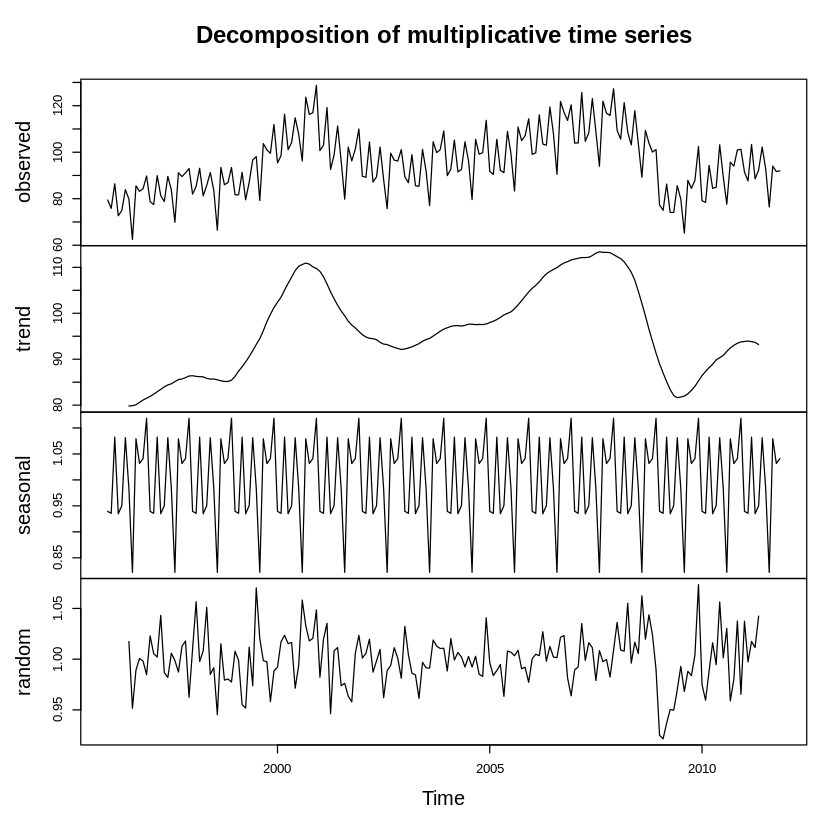

In [20]:
plot(decompose(elecequip, type = "multiplicative"))

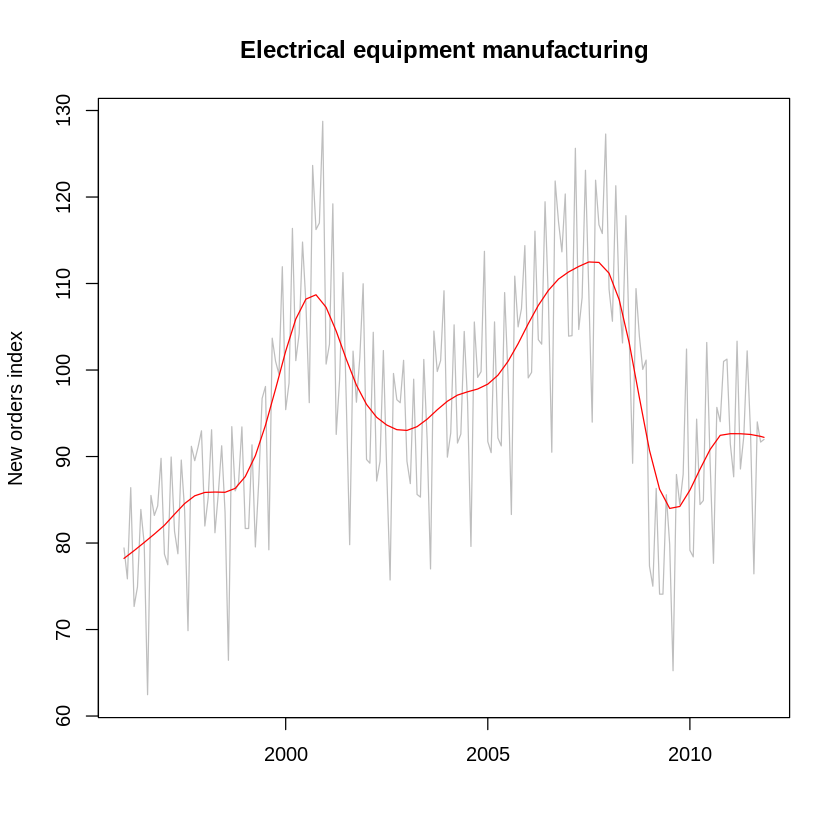

In [4]:
fit <- stl(elecequip, s.window=5)
plot(elecequip, col="gray",
 main="Electrical equipment manufacturing",
 ylab="New orders index", xlab="")
lines(fit$time.series[,2],col="red",ylab="Trend")

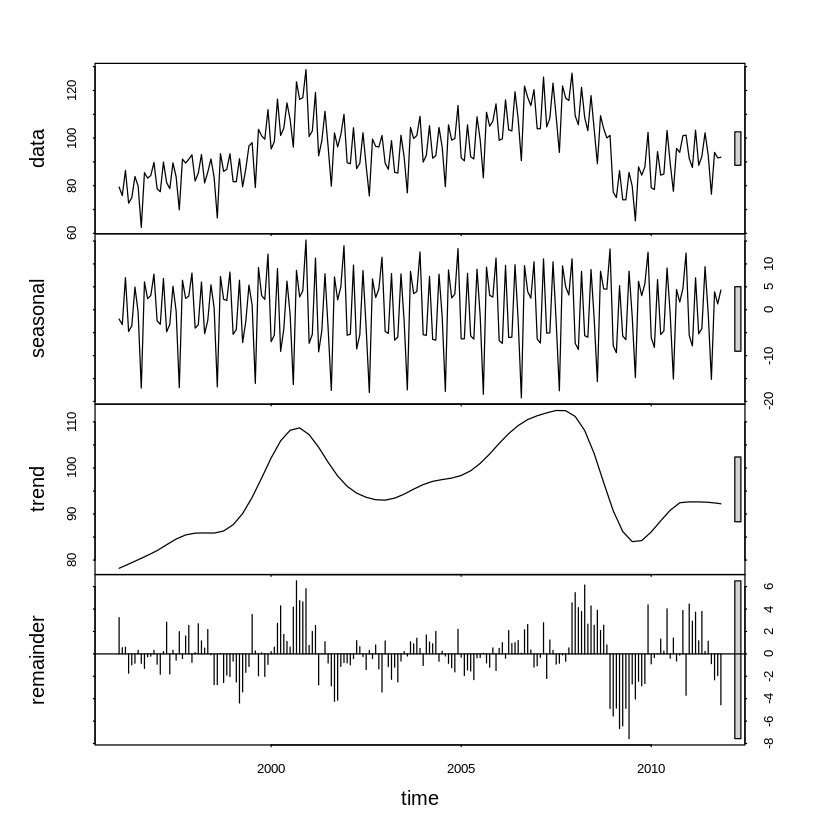

In [5]:
plot(fit)

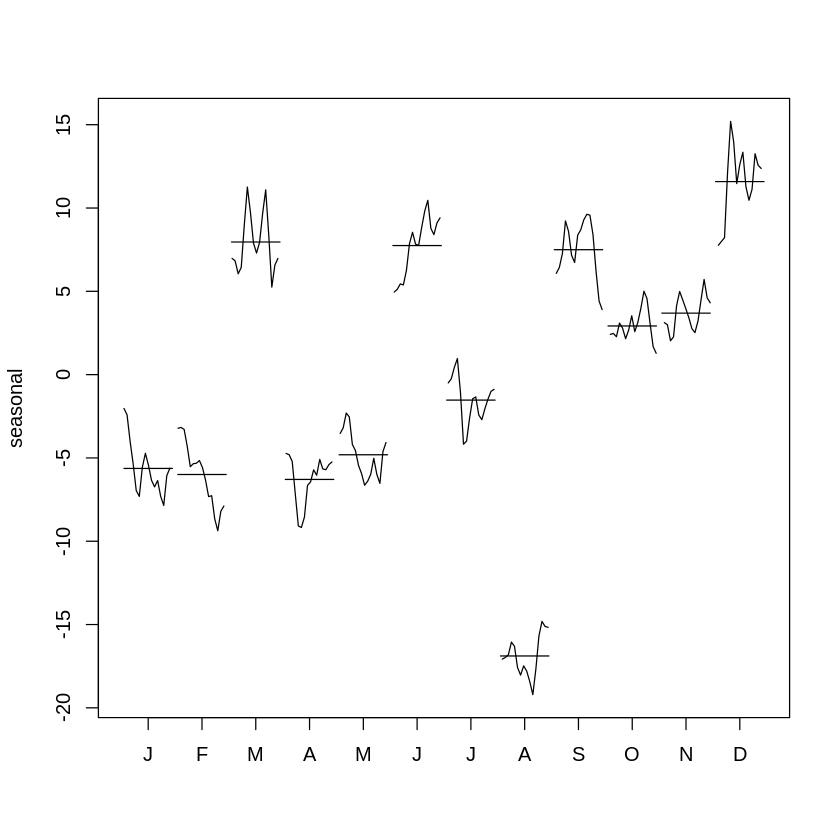

In [6]:
monthplot(fit, choice = "seasonal")

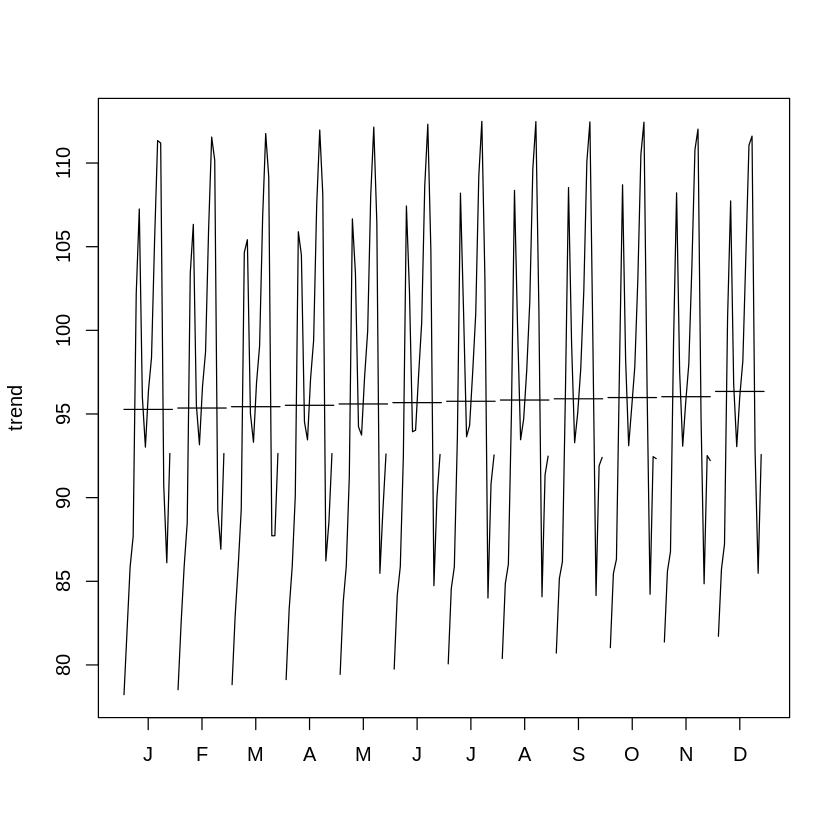

In [8]:
monthplot(fit, choice = "trend")

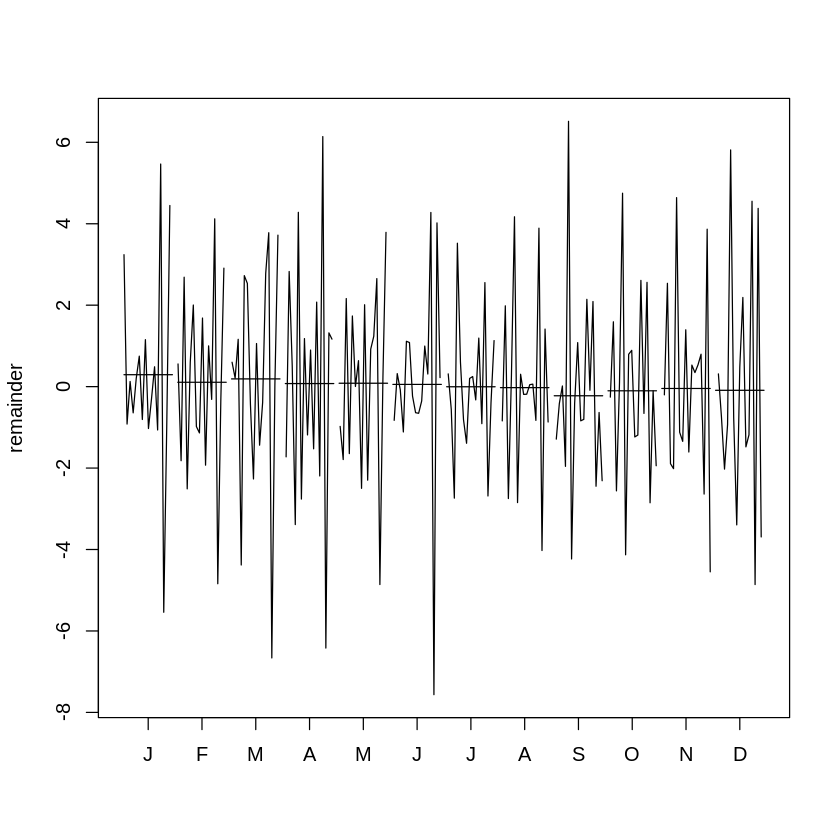

In [10]:
monthplot(fit, choice = "remainder")

the seasonally adjusted plot

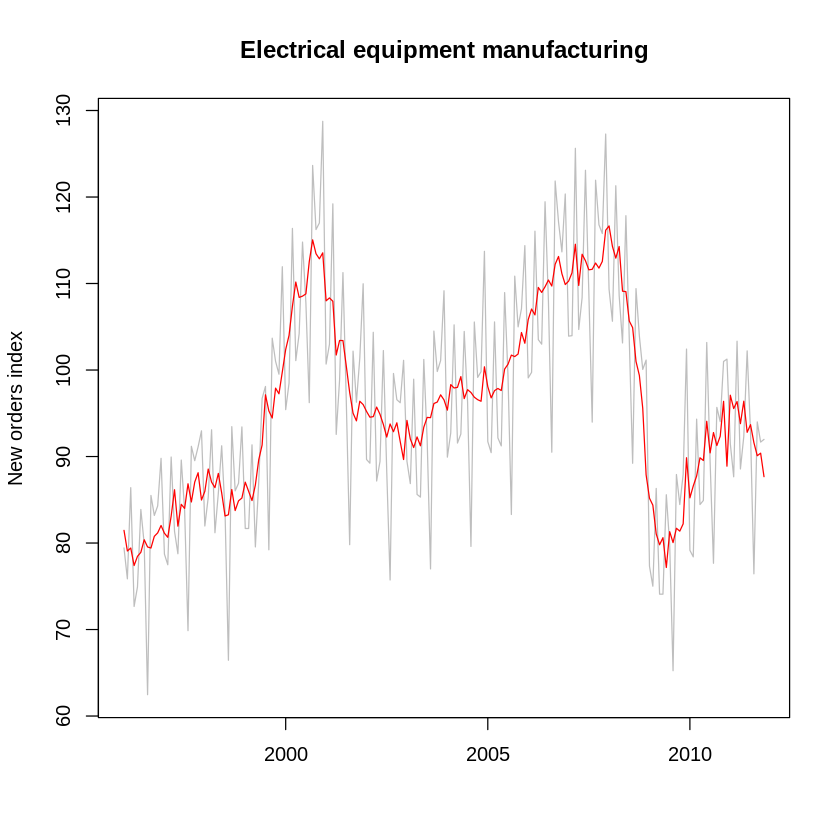

In [14]:
plot(elecequip, col="grey",
 main="Electrical equipment manufacturing",
  xlab="", ylab="New orders index")
lines(seasadj(fit),col="red",ylab="Seasonally adjusted")
#legend('best')

### Seasonal Trend Lowess approach

How about if we detrend the series using STL (seasonal trend using lowess)? 

Note the trend window is set to 15 months and seasonal is set to periodic.


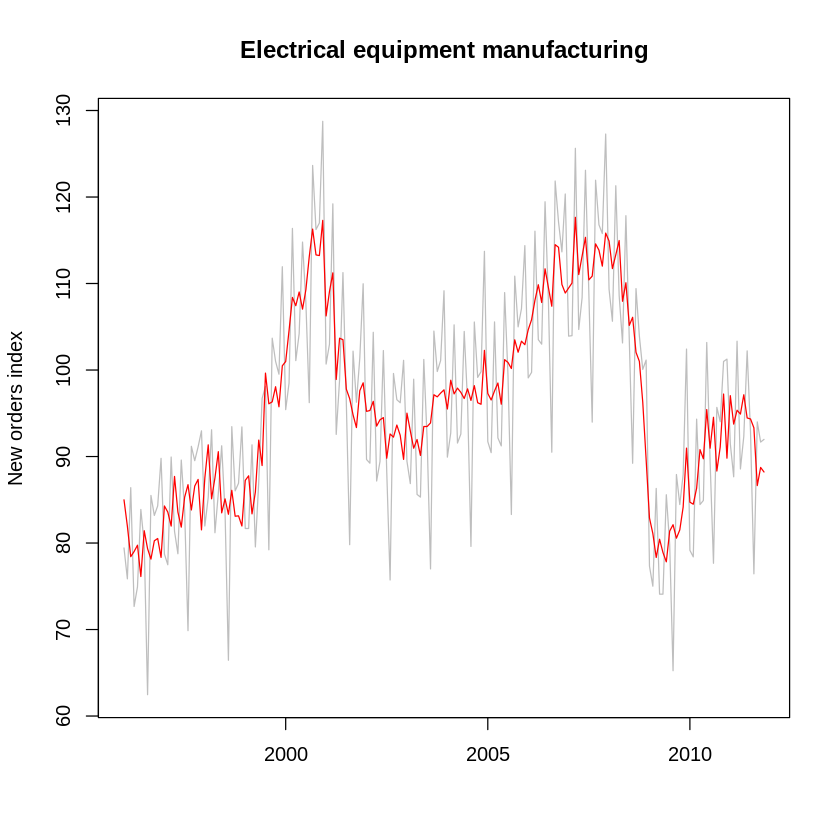

In [15]:
eeadj <- seasadj(stl(elecequip, s.window="periodic"))
plot(elecequip, col="grey",
 main="Electrical equipment manufacturing",
  xlab="", ylab="New orders index")
lines(eeadj,col="red",ylab="Seasonally adjusted")
#plot(eeadj) # plot with only seasonal adjustment

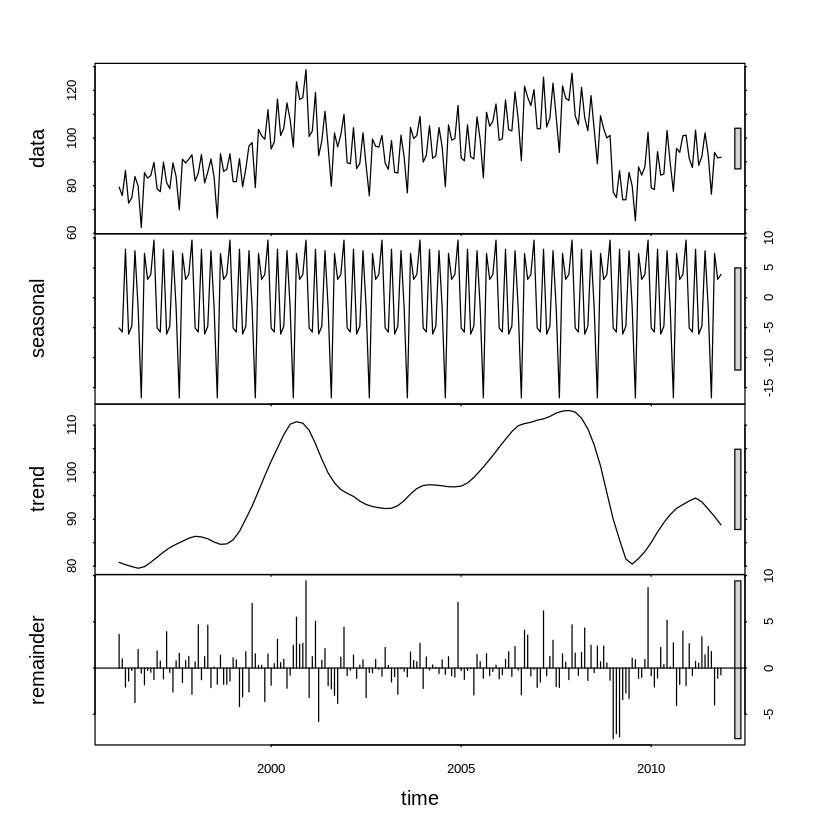

In [16]:
fitloess <- stl(elecequip, t.window=15, s.window="periodic", robust=TRUE)
plot(fitloess)#plot with both trend and seasonal adjusment

### Moving Average

Moving average models are similar, but use the error terms rather than the previous values. That is, here the measurements are based on the lagged errors, rather than the lagged observed values.


The moving average model of order q is denoted MA(q):

$$Y_t = \mu + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t \,,$$

where the parameters to be fit are the θi’s.

Note that the above plot is not adjusted for trend or cycles so is not very useful. Let us look at a plot after computing a 2x12 moving average which is suitable for monthly data.

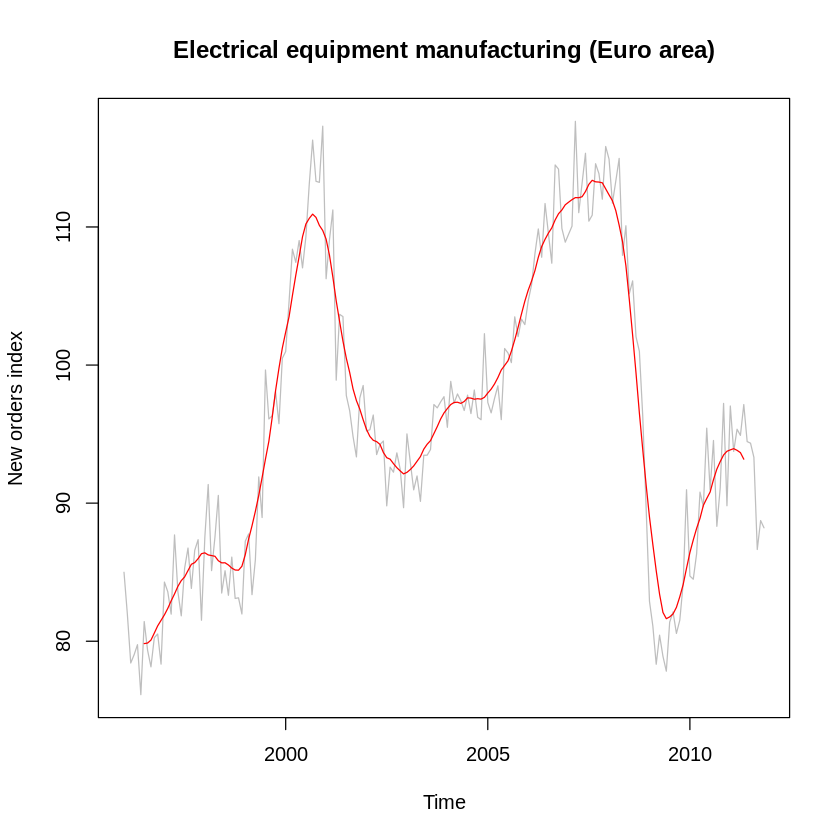

In [17]:
ma.mod <- ma(eeadj, order = 12)
plot(eeadj, ylab="New orders index", col="gray",
 main="Electrical equipment manufacturing (Euro area)")
lines(ma.mod, col="red", label = "Moving average") #moving average for m=12

## Moving average smoothing
A moving average of order mm can be written as
$$\hat{T}_{t} =
\frac{1}{m} \sum_{j=-k}^k y_{t+j},$$

where m=2k+1. 

That is, the estimate of the trend-cycle at time tt is obtained by averaging values of the time series within k periods of t. 

Observations that are nearby in time are also likely to be close in value, and the average eliminates some of the randomness in the data, leaving a **smooth trend-cycle component**. 

We call this an m-MA meaning a moving average of order m.

In [15]:
ma(elecsales, order=5)

Time Series:
Start = 1989 
End = 2008 
Frequency = 1 
 [1]       NA       NA 2381.530 2424.556 2463.758 2552.598 2627.700 2750.622
 [9] 2858.348 3014.704 3077.300 3144.520 3188.700 3202.320 3216.940 3307.296
[17] 3398.754 3485.434       NA       NA

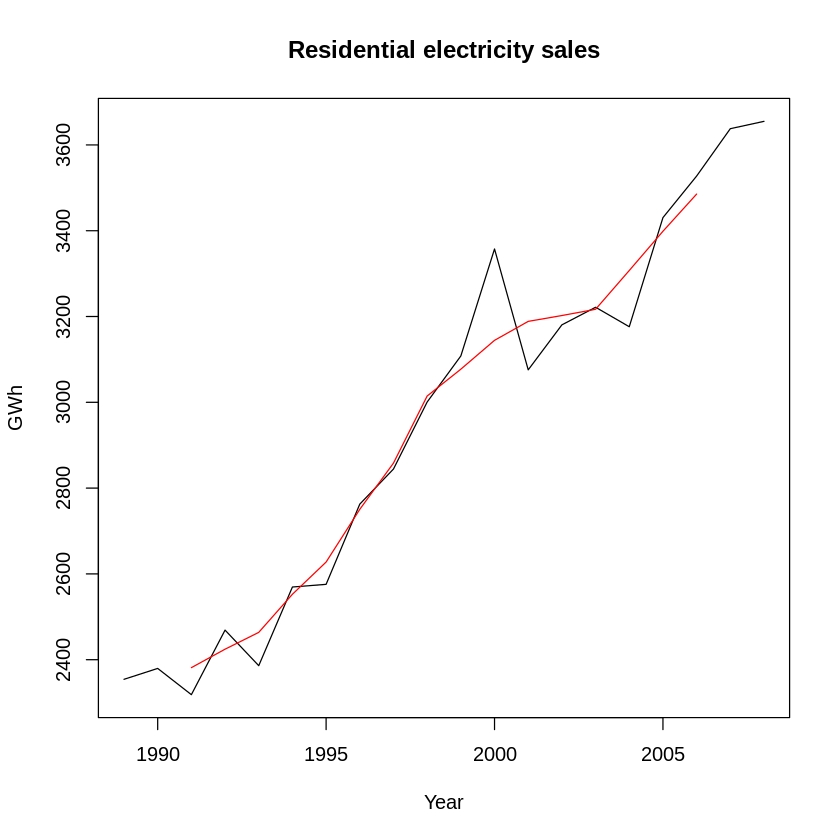

In [16]:
plot(elecsales, main="Residential electricity sales",
 ylab="GWh", xlab="Year")
lines(ma(elecsales,5),col="red")